In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

In [4]:
train_images.shape # 60,000 images that are made up of 28x28 pixels (784 in total).

(60000, 28, 28)

In [5]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [6]:
# Our pixel values are between 0 and 255, 0 being black and 255 being white. 
# This means we have a grayscale image as there are no color channels.

train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
# Our labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. 
# Create an array of label names to indicate which is which.

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

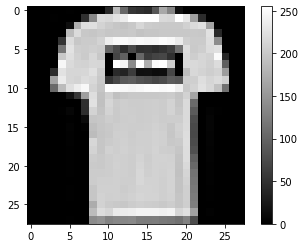

In [9]:
plt.figure()
plt.imshow(train_images[1] , cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Normalize

train_images = train_images / 255.0

test_images = test_images / 255.0

In [11]:
# Building the Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [12]:
# loss function, optimizer and metrics

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
# Training the Model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5050 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3791 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3409 - accuracy: 0.8756
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3130 - accuracy: 0.8844
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2823 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2705 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2591 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2478 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [14]:
# Evaluating the Model

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 804us/step - loss: 0.3326 - accuracy: 0.8824
Test accuracy: 0.8823999762535095


In [15]:
# Making Predictions

predictions = model.predict(test_images)

In [16]:
predictions[0]

array([3.5449289e-06, 5.8171512e-10, 1.7048590e-08, 1.5599567e-10,
       8.4760309e-08, 1.6722143e-04, 2.9616422e-06, 4.2595204e-02,
       9.3824190e-07, 9.5723003e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

Pick a number: 9


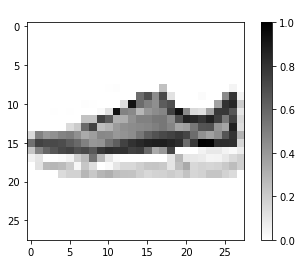

In [20]:
# Verifying Predictions

COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)